In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import filtfilt
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statistics
import pywt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [2]:
ds = xr.open_dataset('www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf/output.nc')

In [3]:
ds_new = xr.open_dataset('www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf.correct-timeunit/merged_v5sst.nc')

In [4]:
ds_new

<xarray.Dataset>
Dimensions:  (time: 2002, lon: 180, lat: 89, lev: 1)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-15 1854-02-15 ... 2021-05-15
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    ssta     (time, lev, lat, lon) float32 ...
Attributes: (12/71)
    CDI:                           Climate Data Interface version 1.9.9 (http...
    source:                        In situ data: ICOADS R3.0 before 2016, ICO...
    institution:                   NOAA/NESDIS/NCEI/CCOG
    Conventions:                   CF-1.6, ACDD-1.3
    metadata_link:                 https://doi.org/10.7289/V5T72FNM
    dataset_doi:                   https://doi.org/10.7289/V5T72FNM
    ...                            ...
    climatology:                   Climatology is based on 1971-2000 SST, Xue...
    acknowledgment:                The NOAA Extended Reconstructed Sea Surfac...
    history:                       Sun Aug 01 13:31:33 2021: cdo mergetime er...
    NCO:                           netCDF Operators version 4.7.5 (Homepage =...
    nco_openmp_thread_number:      1
    CDO:                           Climate Data Operators version 1.9.9 (http...

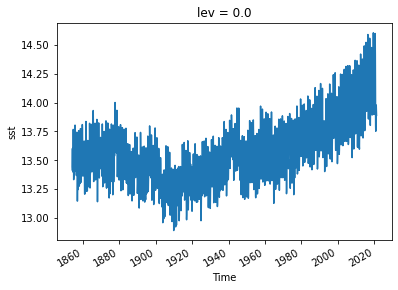

In [5]:
ds_new['sst'][:,0,:,:].mean(dim=['lon','lat']).plot()

In [6]:
ds_des  = xr.open_dataset('www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf.correct-timeunit/de_sea.nc')
ds_des

<xarray.Dataset>
Dimensions:  (time: 2002, lon: 180, lat: 89, lev: 1)
Coordinates:
  * time     (time) datetime64[ns] 1854-01-15 1854-02-15 ... 2021-05-15
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    ssta     (time, lev, lat, lon) float32 ...
Attributes: (12/71)
    CDI:                           Climate Data Interface version 1.9.9 (http...
    source:                        In situ data: ICOADS R3.0 before 2016, ICO...
    institution:                   NOAA/NESDIS/NCEI/CCOG
    Conventions:                   CF-1.6, ACDD-1.3
    metadata_link:                 https://doi.org/10.7289/V5T72FNM
    dataset_doi:                   https://doi.org/10.7289/V5T72FNM
    ...                            ...
    climatology:                   Climatology is based on 1971-2000 SST, Xue...
    acknowledgment:                The NOAA Extended Reconstructed Sea Surfac...
    history:                       Sun Aug 01 16:07:16 2021: cdo sub merged_v...
    NCO:                           netCDF Operators version 4.7.5 (Homepage =...
    nco_openmp_thread_number:      1
    CDO:                           Climate Data Operators version 1.9.9 (http...

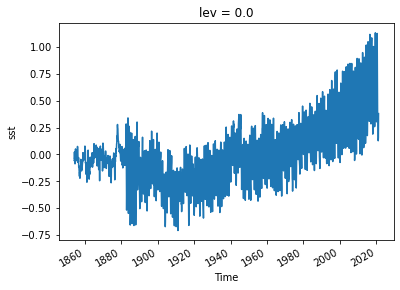

In [7]:
ds_des['sst'][:,0].mean(dim=['lat','lon']).plot()

In [8]:
ds_des1  = xr.open_dataset('www.ncei.noaa.gov/pub/data/cmb/ersst/v5/netcdf.correct-timeunit/de_sea1.nc')

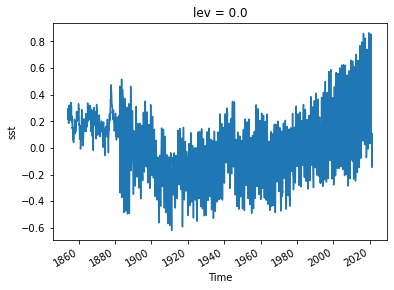

In [9]:
ds_des1['sst'][:,0].mean(dim=['lat','lon']).plot()

In [72]:
ds_des1.time.values

array(['1854-01-15T00:00:00.000000000', '1854-02-15T00:00:00.000000000',
       '1854-03-15T00:00:00.000000000', ...,
       '2021-03-15T00:00:00.000000000', '2021-04-15T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [79]:
dates1 = pd.date_range('15/01/1854','15/05/2021',periods=2002)

In [10]:
ssta = ds_des1['sst'][:,0]

In [11]:
def bandPassFilter(signal):
    
    fs=2008
    lowcut=5.577
    highcut=20.916
    
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    
    order = 2
    
    b,a = scipy.signal.butter(order,[low,high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b,a,signal)
    
    return(y)

In [12]:
temp_std=[]
temp_fs=[]
for i in range(180):
    for j in range(89):
        filtered_signal = bandPassFilter(ssta[:,j,i])
        st_temp = statistics.stdev(filtered_signal)
        temp_std.append(st_temp)
        temp_fs.append(filtered_signal)

In [13]:
temp_std1 = np.array(temp_std).reshape(180,89).T

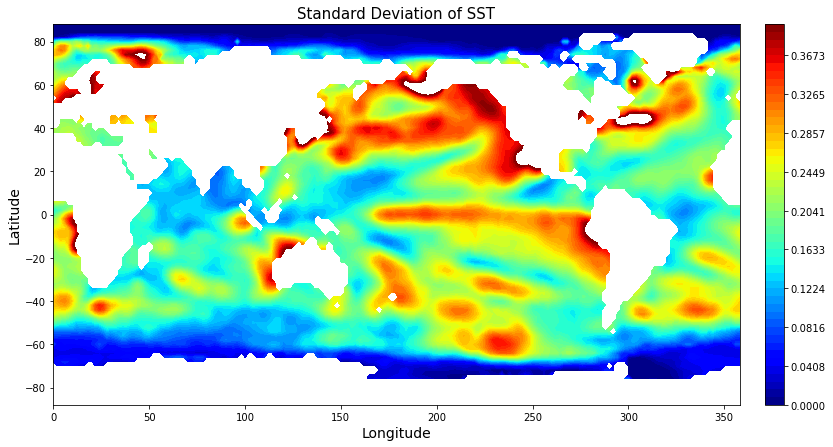

In [14]:
fig = plt.figure(figsize=[15,7])
ax = plt.subplot(111)
# ax.add_feature(cfeature.COASTLINE)
p = ax.contourf(ds_des1.lon,ds_des1.lat,temp_std1,levels=np.linspace(0,0.4),cmap='jet')
plt.colorbar(p,pad=0.03)
# plt.grid()
plt.title('Standard Deviation of SST', fontsize=15)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.show()

In [15]:
temp_fs1 = np.array(temp_fs).reshape(180,89,2002).T

In [16]:
temp_fs1.shape

(2002, 89, 180)

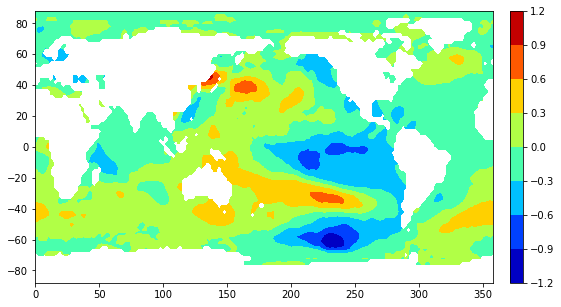

In [17]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(111)
# ax.add_feature(cfeature.COASTLINE)
p = ax.contourf(ds_des1.lon,ds_des1.lat,temp_fs1[450],cmap='jet')
plt.colorbar(p,pad=0.03)
# plt.grid()

In [18]:
temp_fs2 = xr.DataArray(temp_fs1)

In [19]:
temp_in = temp_fs2.copy()

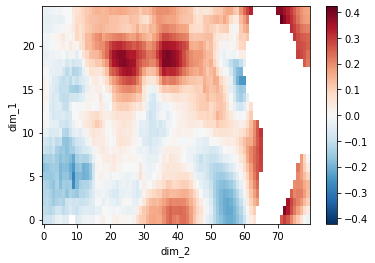

In [20]:
temp_in[0].sel(dim_2=slice(80,160),dim_1=(slice(25,50))).plot()#.mean(dim=['dim_2','dim_1'])

In [21]:
peru = temp_in.sel(dim_2=slice(80,160),dim_1=(slice(25,50))).mean(dim=['dim_2','dim_1'])

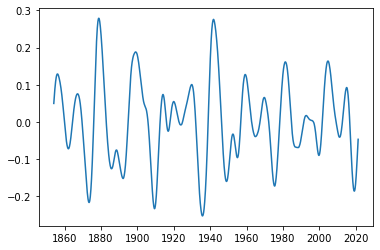

In [81]:
plt.plot(dates1,peru)

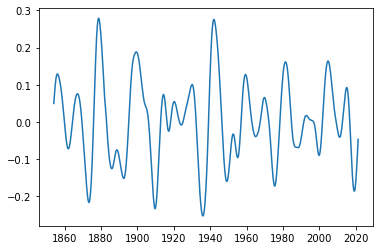

In [22]:
plt.plot(ds_des1.time,peru)#.plot()

Lag-1 autocorrelation = 1.00


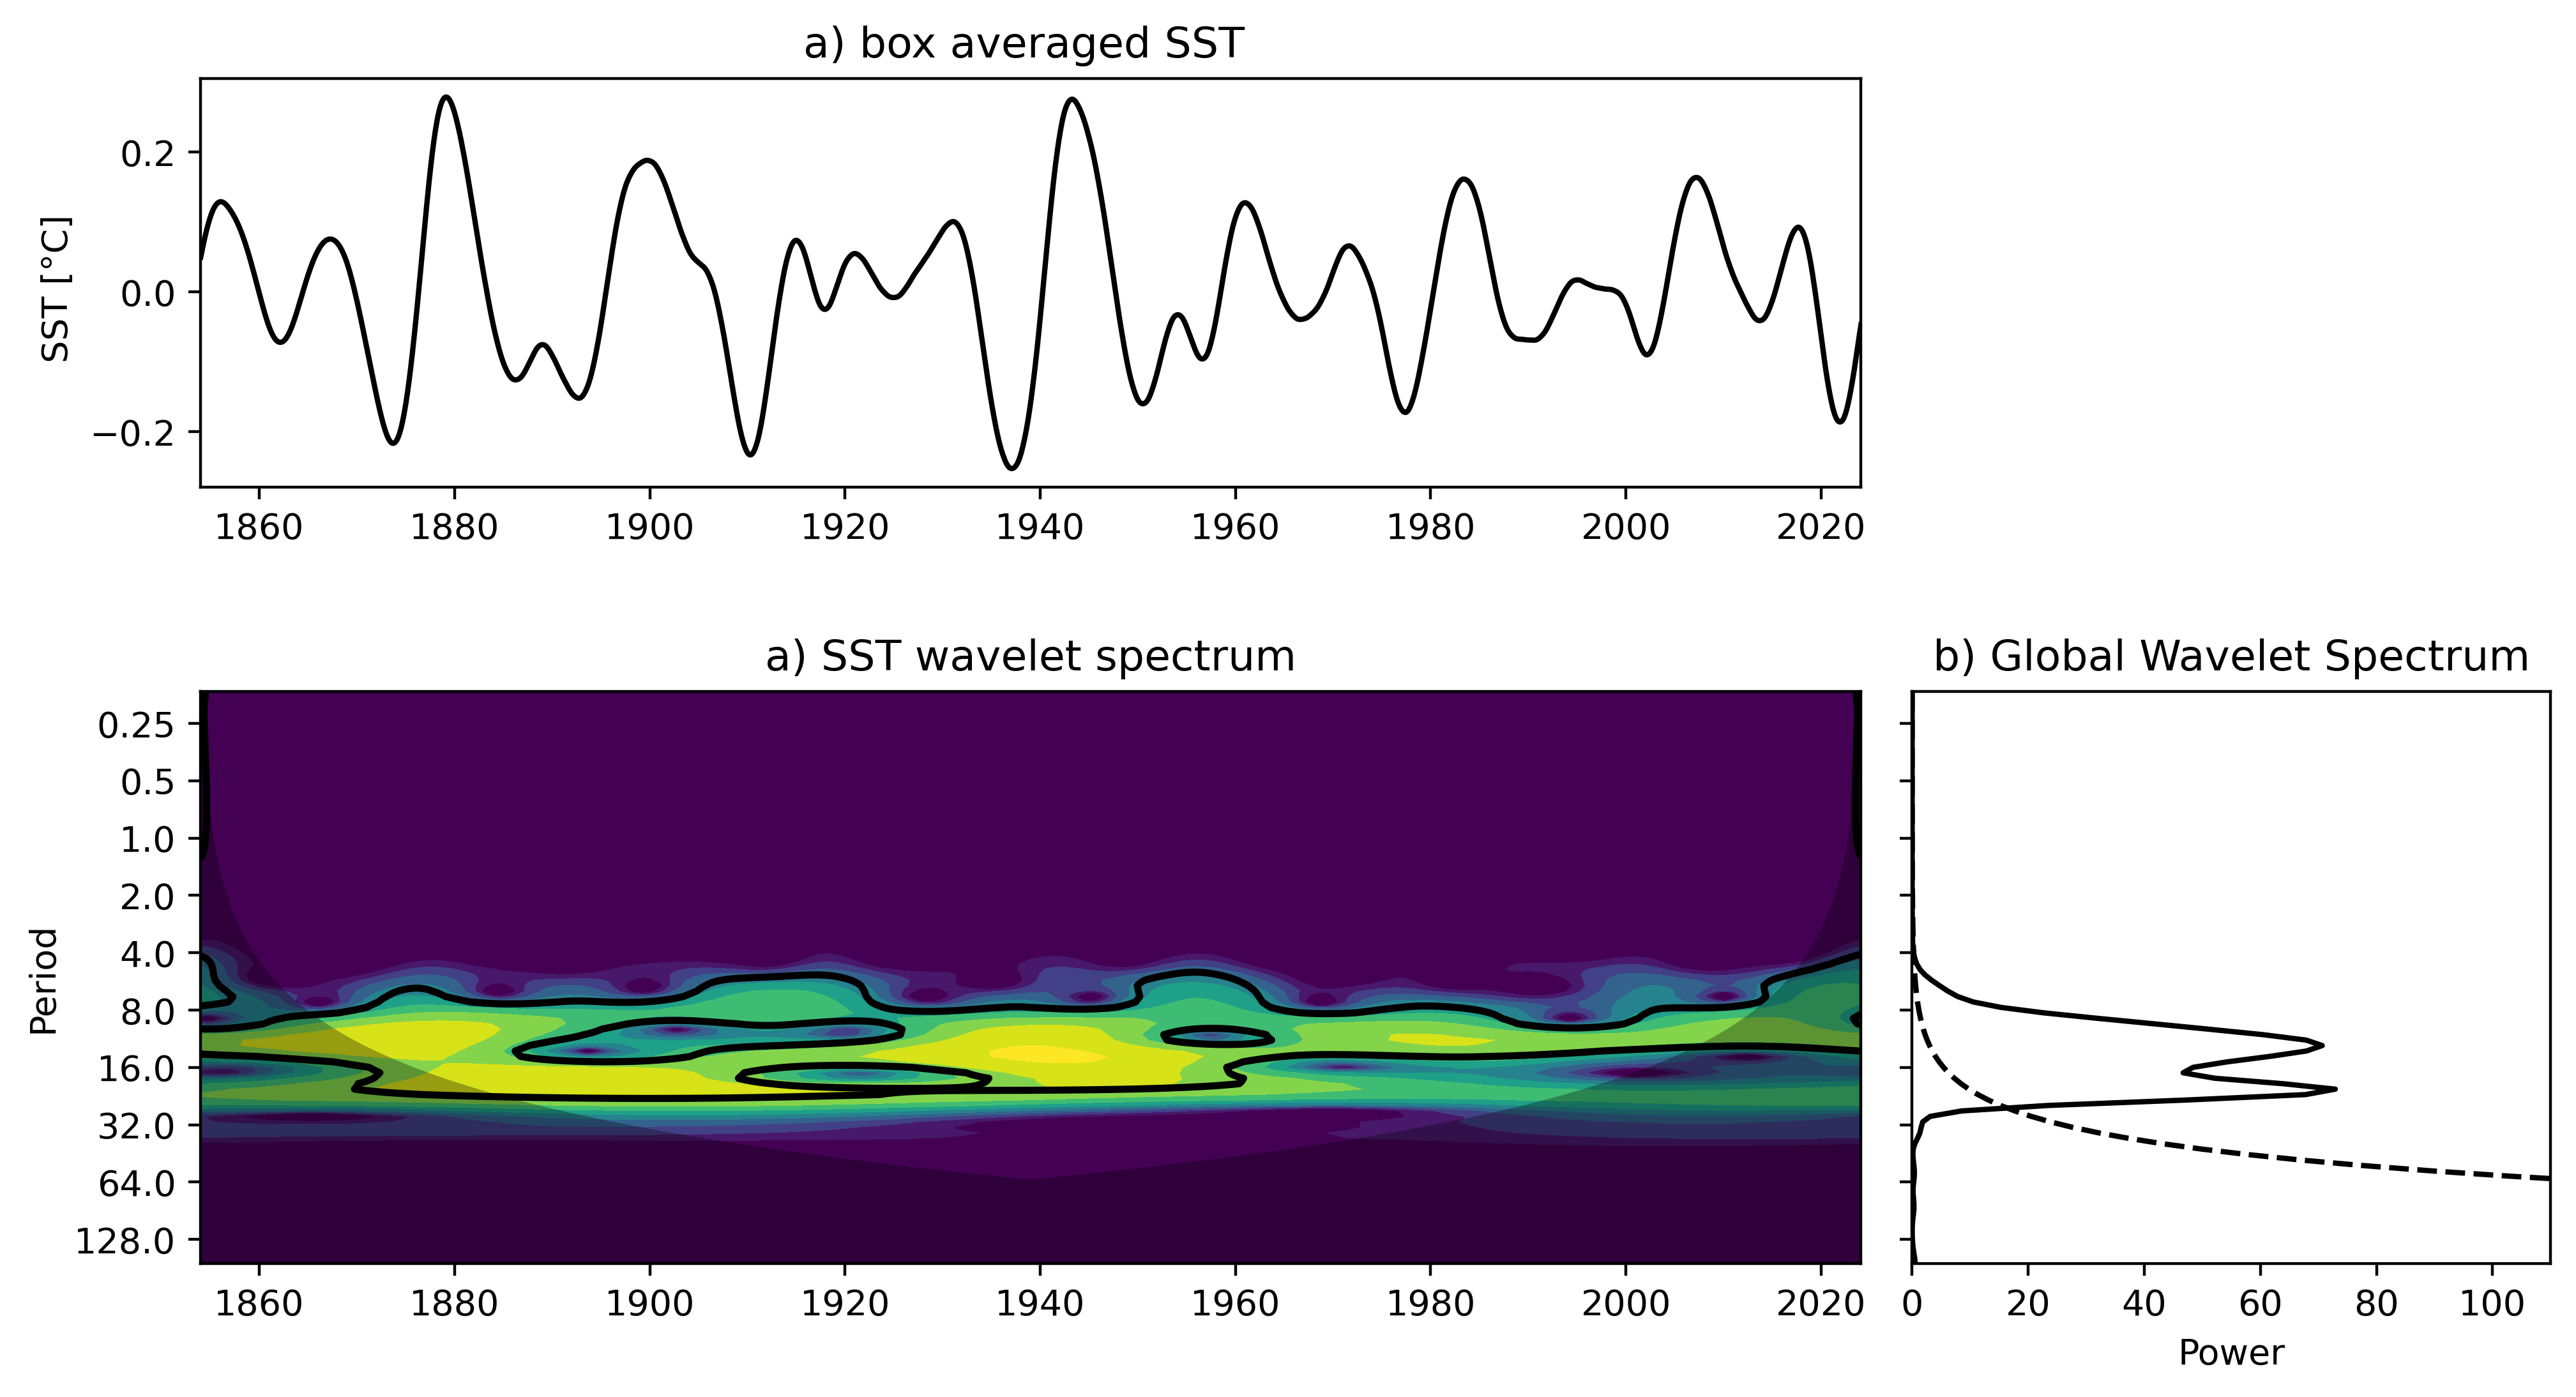

In [50]:
wavana(peru)

In [10]:
# ds.ssta.to_netcdf('ssta.nc')

In [27]:
ds1 = xr.open_dataset('ssta_dtr.nc')

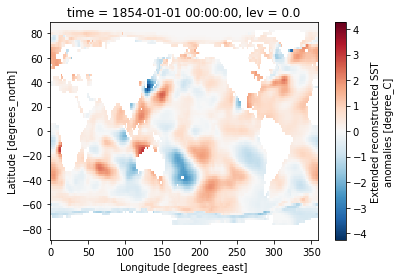

In [160]:
ds1.ssta[0].plot()

In [36]:
datetimeindex = ds_des1.time.indexes['time'].values

In [ ]:
datetimeindex

In [37]:
ssta = ds1.ssta[:,0,:,:]

In [38]:
ssta.shape,ssta.dims

((2008, 89, 180), ('time', 'lat', 'lon'))

In [ ]:
plt.plot(datetimeindex,ssta.mean(dim=['lon','lat']))
plt.draw()

In [96]:
temp_std=[]
temp_fs=[]
for i in range(180):
    for j in range(89):
        filtered_signal = bandPassFilter(ssta[:,j,i])
        st_temp = statistics.stdev(filtered_signal)
        temp_std.append(st_temp)
        temp_fs.append(filtered_signal)

In [97]:
temp_std = np.array(temp_std).reshape(180,89).T

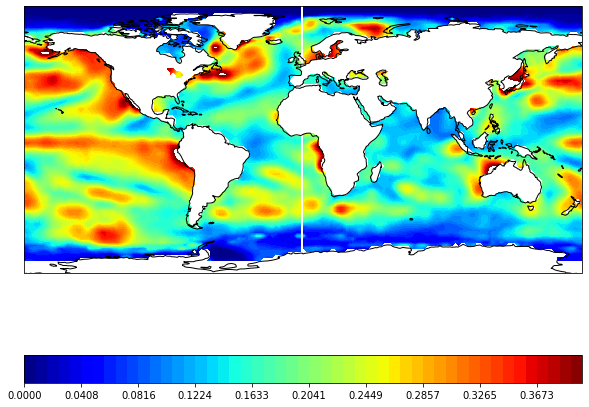

In [209]:
fig = plt.figure(figsize=[10,10])
ax = plt.subplot(111,projection = ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
p = ax.contourf(ds1.lon,ds1.lat,temp_std,levels=np.linspace(0,0.4),cmap='jet',crs=ccrs.PlateCarree())
plt.colorbar(p)
# plt.grid()

In [99]:
temp_fs = np.array(temp_fs).reshape(180,89,2008).T

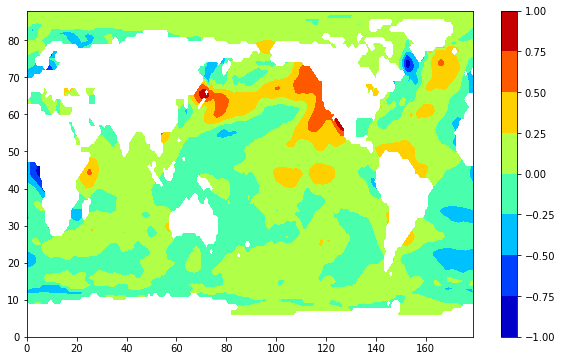

In [108]:
plt.figure(figsize=[10,6])
plt.contourf(temp_fs[0,:,:],cmap='jet')
plt.colorbar()

In [109]:
temp_fs = xr.DataArray(temp_fs)

In [111]:
temp_in = temp_fs

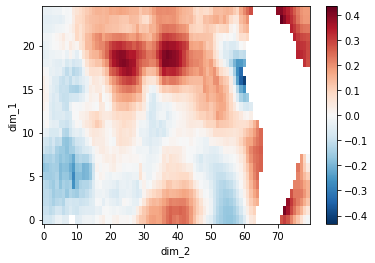

In [117]:
temp_in[0].sel(dim_2=slice(80,160),dim_1=(slice(25,50))).plot()#.mean(dim=['dim_2','dim_1'])

In [119]:
peru = temp_in.sel(dim_2=slice(80,160),dim_1=(slice(25,50))).mean(dim=['dim_2','dim_1'])

In [43]:
dates=pd.date_range('01/01/1854','15/05/2021',freq='M')

In [70]:
dates.shape,peru.shape

((2008,), (2002,))

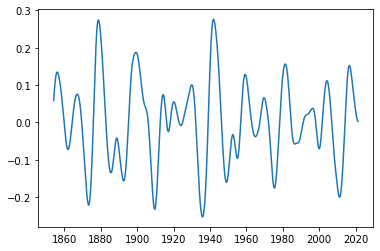

In [139]:
plt.plot(dates,peru)#.plot()

In [46]:
from __future__ import division
import pycwt as wavelet
from pycwt.helpers import find

In [115]:
def wavana(sig):
    t0 = 1854.0
    dt = 0.085
    dat=sig
    dat=np.array(dat)
    t=dates1.copy()
    t=t.year
    N = dat.size
    t = np.arange(0, N) * dt + t0
    p = np.polyfit(t - t0, dat, 1)
    dat_notrend = dat - np.polyval(p, t - t0)
    std = dat_notrend.std()  # Standard deviation
    var = std ** 2  # Variance
    dat_norm = dat_notrend / std  # Normalized dataset
    alpha = np.corrcoef(dat_norm[0:-1], dat_norm[1:])[0,1]; 
    print("Lag-1 autocorrelation = {:4.2f}".format(alpha))
    mother = wavelet.Morlet(6)
    s0 = -1 #2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
    dj = 0.095  # Twelve sub-octaves per octaves
    J = -1 #7 / dj  # Seven powers of two with dj sub-octaves
    #alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise
    wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,mother)
    iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std
    power = (np.abs(wave)) ** 2
    fft_power = np.abs(fft) ** 2
    period = 1 / freqs
    plt.contourf(power)
    plt.colorbar()
    #plt.show()
    power /= scales[:, None]
    signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.95,
                                         wavelet=mother)
    sig95 = np.ones([1, N]) * signif[:, None]
    sig95 = power / sig95
    glbl_power = power.mean(axis=1)
    dof = N - scales  # Correction for padding at edges
    glbl_signif, tmp = wavelet.significance(2.0, dt, scales, 1, alpha,
                                        significance_level=0.95, dof=dof,
                                        wavelet=mother)
    # Prepare the figure

    plt.close('all')
    plt.ioff()
    figprops = dict(figsize=(10, 8), dpi=400)
    fig = plt.figure(**figprops)

    # First sub-plot, the original time series anomaly and inverse wavelet
    # transform.
    ax = plt.axes([0.1, 0.75, 0.65, 0.2])
#     ax.plot(t, iwave, '-', linewidth=1, color=[0.5, 0.5, 0.5])
    ax.plot(t, dat, 'k', linewidth=1.5)
#     ax.set_title('a) {}'.format(title))
    ax.set_title('a) box averaged SST ')
#     ax.set_ylabel(r'{} [{}]'.format(label, units))
    ax.set_ylabel('SST [°C] ')

#     Second sub-plot, the normalized wavelet power spectrum and significance
#     level contour lines and cone of influece hatched area. Note that period
#     scale is logarithmic.
    bx = plt.axes([0.1, 0.37, 0.65, 0.28],sharex=ax)
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
    bx.contourf(t, np.log2(period), np.log2(power), np.log2(levels),
                extend='both', cmap=plt.cm.jet)
    extent = [t.min(), t.max(), 0, max(period)]
    bx.contour(t, np.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
               extent=extent)
    bx.fill(np.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                               t[:1] - dt, t[:1] - dt]),
            np.concatenate([np.log2(coi), [1e-9], np.log2(period[-1:]),
                               np.log2(period[-1:]), [1e-9]]),
            'k', alpha=0.3)
    #bx.set_title('b) {} Wavelet Power Spectrum ({})'.format(label, mother.name))
    bx.set_title('a) SST wavelet spectrum')
    bx.set_ylabel('Period')
    #
    Yticks = 2 ** np.arange(np.ceil(np.log2(period.min())),
                               np.ceil(np.log2(period.max())))
    bx.set_yticks(np.log2(Yticks))
    bx.set_yticklabels(Yticks)
    plt.gca().invert_yaxis()
    # Third sub-plot, the global wavelet and Fourier power spectra and theoretical
    # noise spectra. Note that period scale is logarithmic.
    cx = plt.axes([0.77, 0.37, 0.25, 0.28], sharey=bx)
    cx.plot(glbl_signif, np.log2(period), 'k--')
    #cx.plot(var * fft_theor, numpy.log2(period), '--', color='#cccccc')
    #cx.plot(var * fft_power, numpy.log2(1./fftfreqs), '-', color='#cccccc',
    #        linewidth=1.)
    cx.plot(11 * glbl_power, np.log2(period), 'k-', linewidth=1.5)
    cx.set_title('b) Global Wavelet Spectrum')
    #cx.set_xlabel(r'Power [({})^2]'.format(units))
    cx.set_xlabel('Power')
    # cx.set_xlim([0, glbl_power.max() + var])
    cx.set_xlim(0,110)
    cx.set_ylim(np.log2([period.min(), period.max()]))
    cx.set_yticks(np.log2(Yticks))
    cx.set_yticklabels(Yticks)
    plt.setp(cx.get_yticklabels(), visible=False)
    plt.gca().invert_yaxis()
    # # Fourth sub-plot, the scale averaged wavelet spectrum.
    # dx = pyplot.axes([0.1, 0.07, 0.65, 0.2], sharex=ax)
    # dx.axhline(scale_avg_signif, color='k', linestyle='--', linewidth=1.)
    # dx.plot(t, scale_avg, 'k-', linewidth=1.5)
    # dx.set_title('d) {}--{} year scale-averaged power'.format(2, 8))
    # dx.set_xlabel('Time (year)')
    # dx.set_ylabel(r'Average variance [{}]'.format(units))
    ax.set_xlim([t.min(), t.max()])
    #plt.savefig('wavelet.jpg',dpi=300)
    plt.show()


Lag-1 autocorrelation = 1.00


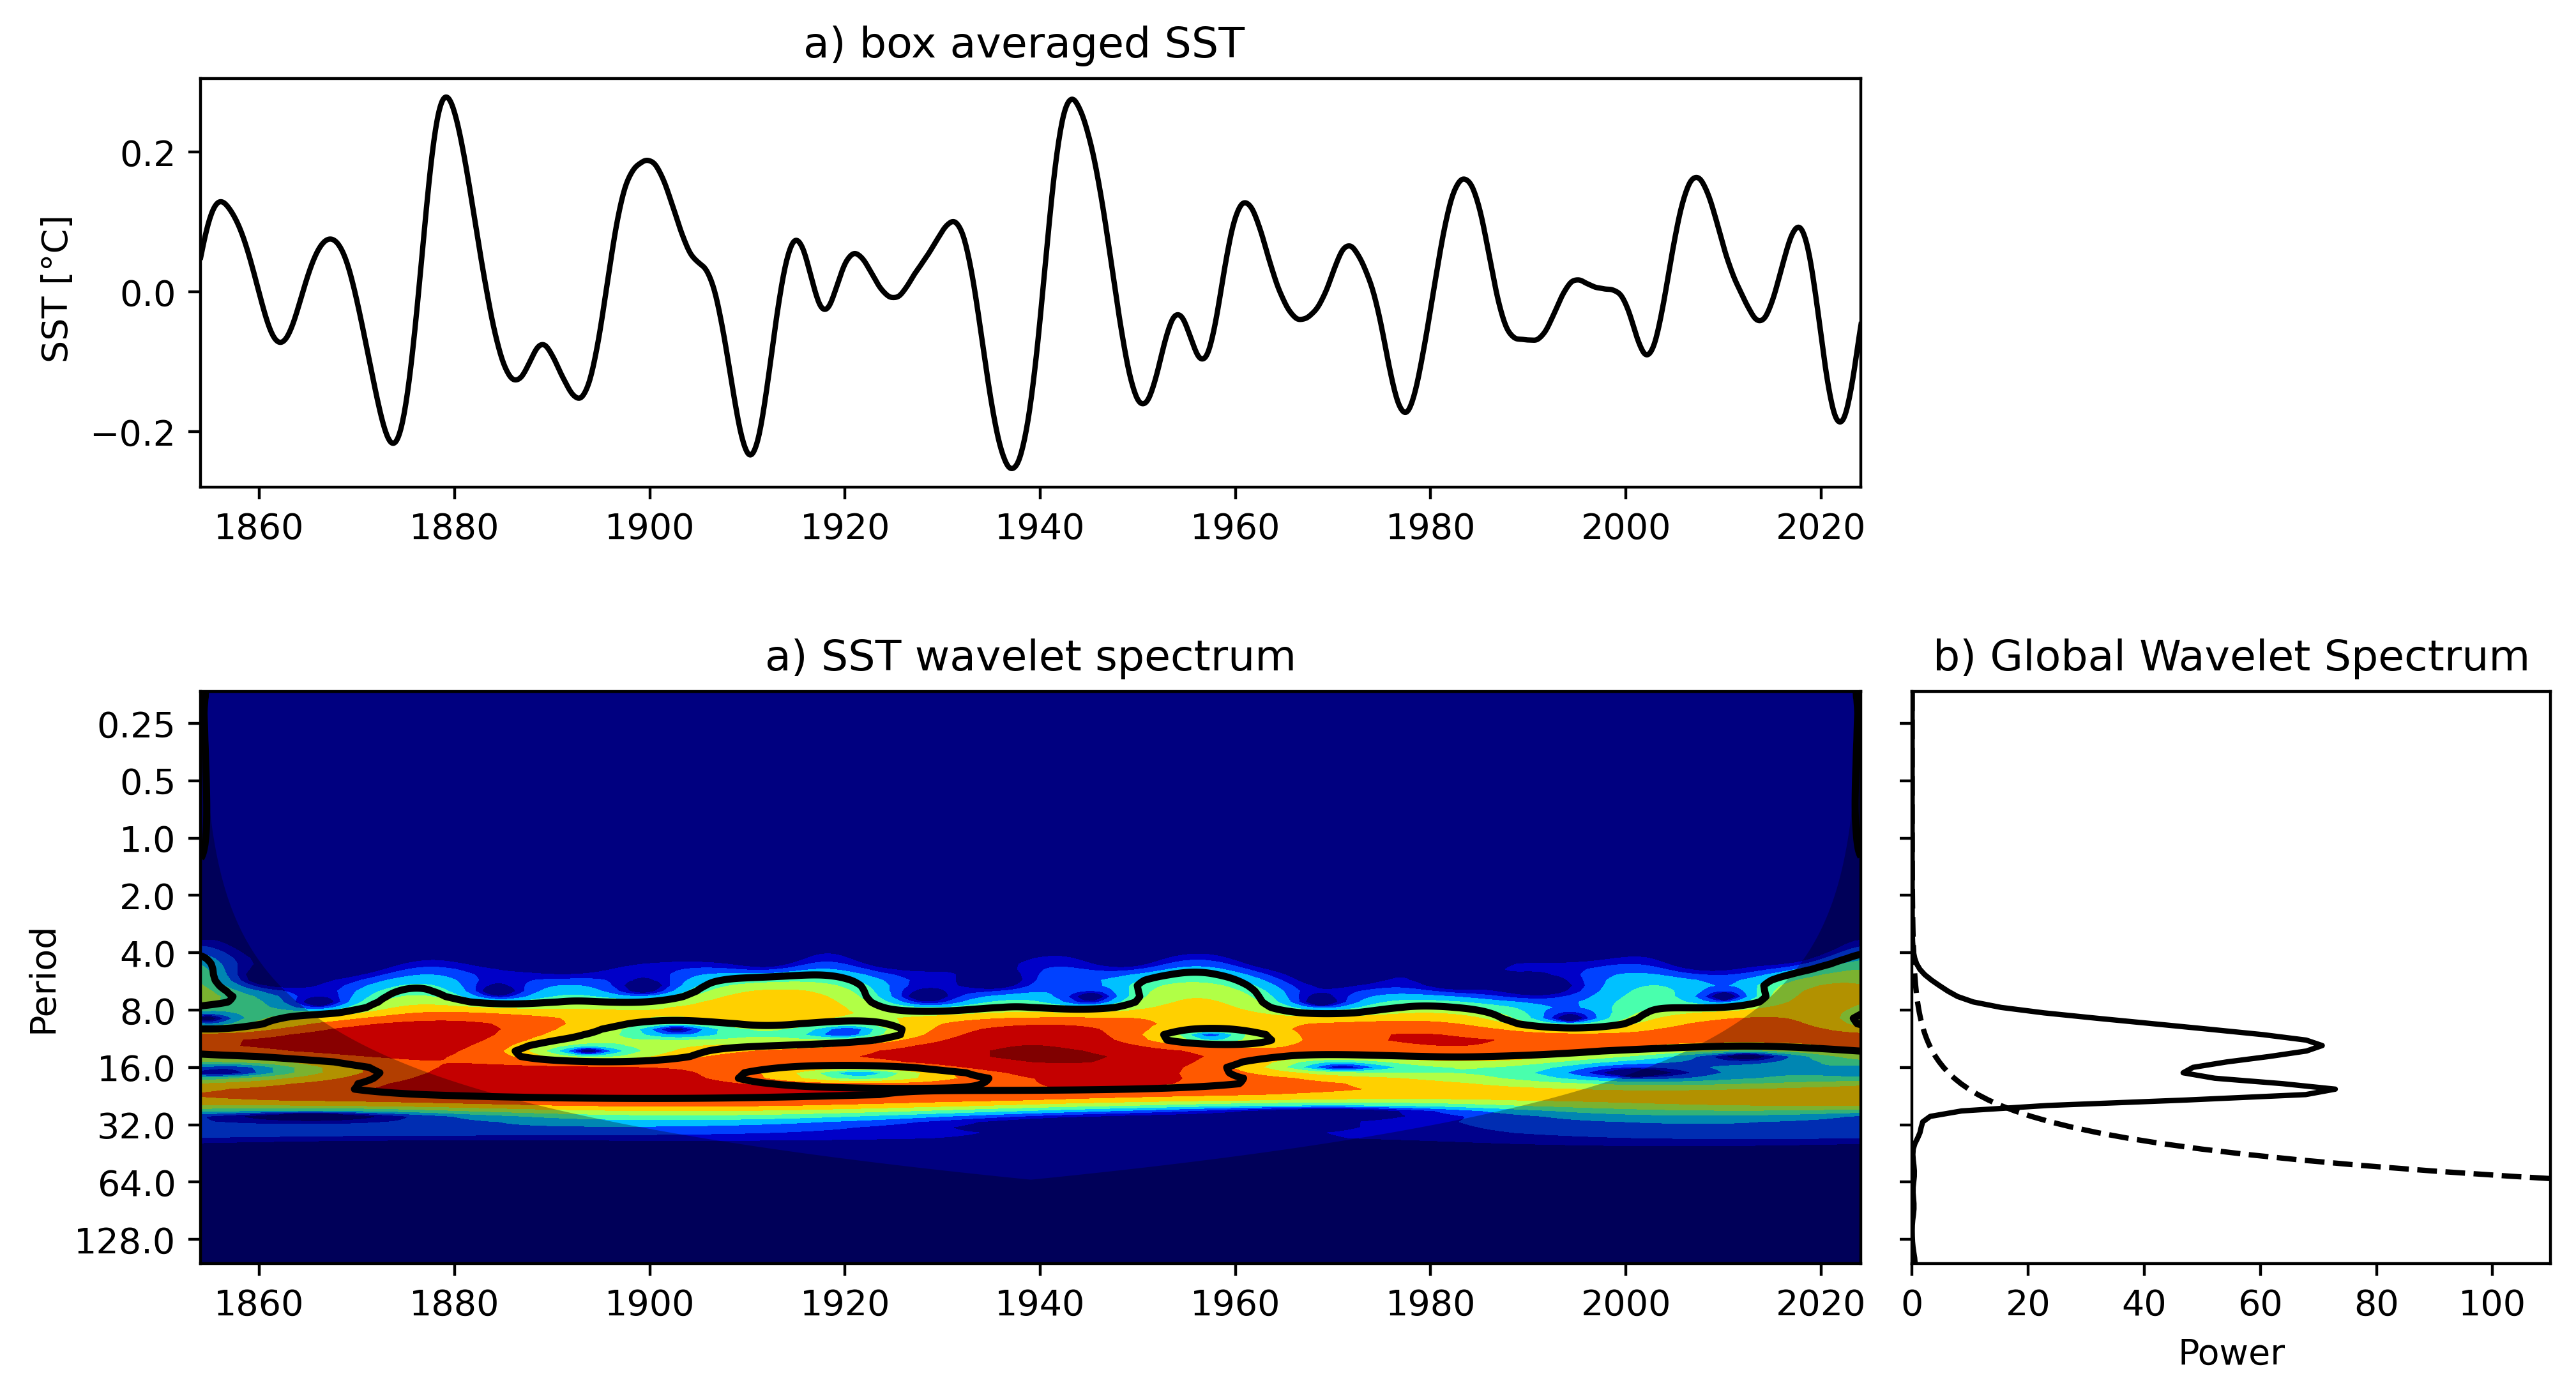

In [116]:
wavana(peru)

In [53]:
2008/(12*8),2008/(12*30)

(20.916666666666668, 5.5777777777777775)

In [125]:
pwd

'/home/PDTC/PDTCHACPL/MCRKalapureddy/Hamid/1958-1979'

In [2]:
ds3 = xr.open_dataset('data_bckEx/503871.SSTK.e5p.oper.an.sfc.128_034_sstk.ll025sc.1950010100_1950013123.nc')

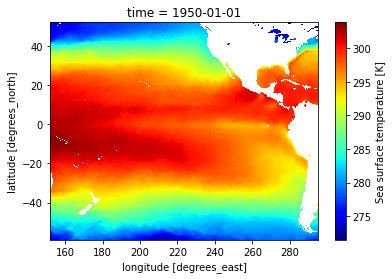

In [6]:
ds3['SSTK'][0].plot(cmap=plt.cm.jet)

In [ ]:
ds3['SSTK'][0].plot(cmap=plt.cm.jet)

# Download data from cds.copernicus

In [24]:
import waipy

In [65]:
data_norm = waipy.normalize(peru)

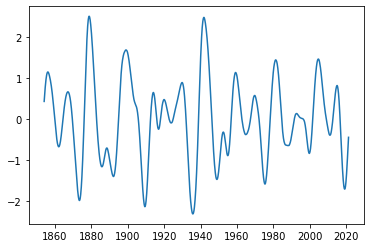

In [82]:
plt.plot(dates1,data_norm)

In [84]:
N =data_norm.size      # the time series of length N.
dt = 0.085    # amount of time between each time series value, i.e. the sampling time.
            # seasonal data 1/4 year - 4 measures in 1 year
T1 = 1854.0  # start time

In [124]:
pad = 1         # pad the time series with zeroes (recommended)
dj = 0.0595# this will do 4 sub-octaves per octave
s0 = 2*dt       # this says start at a scale of 6 months if dt =annual
j1 = 7/dj       # this says do 7 powers-of-two with dj sub-octaves each
lag1 = 1    # lag-1 autocorrelation for red noise background
param = 6
mother = 'Morlet'
result = waipy.cwt(data_norm, dt, pad, dj, s0, j1, lag1, param, mother='Morlet',name='Nino3')
#waipy.wavelet_plot('Sine', z, data_norm, 0.03125, result)

Nr of Scales: 167
scales [0.17, 0.17715777049769593, 0.18461691557479004, 0.19239012446700682, 0.20049062068440673, 0.20893218450675727, 0.217729176426061, 0.22689656157612034, 0.23644993519069799, 0.24640554913358087, 0.25678033954568036, 0.2675919556562004, 0.27885878980688694, 0.29060000874043357, 0.30283558620627155, 0.31558633693921095, 0.32887395206873693, 0.3427210360191973, 0.35715114496365613, 0.37218882689682775, 0.38785966339526406, 0.40419031313583403, 0.42120855724652906, 0.43894334656674244, 0.45742485089742085, 0.47668451032487097, 0.49675508870552976, 0.5176707294026872, 0.5394670133699772, 0.5621810196804462, 0.5858513886041716, 0.6105183873417314, 0.6362239785253521, 0.6630118916042667, 0.6909276972357171, 0.7200188848081573, 0.7503349432285322, 0.7819274451110707, 0.8148501345108048, 0.8491590183510694, 0.8849124617005147, 0.9221712870617113, 0.9609988778402561, 1.0014612861703966, 1.0436273452806029, 1.0875687865902395, 1.133360361736537, 1.1810799697394534, 1.23080

/home/PDTC/PDTCHACPL/MCRKalapureddy/anaconda3/envs/wradlib/lib/python3.8/site-packages/waipy/cwt/wavetest.py:401: RuntimeWarning: divide by zero encountered in true_divide
  sig95 = power / sig95  # where ratio > 1, power is significant


ValueError: dimensions () must have the same length as the number of data dimensions, ndim=1

In [3]:
19981231-19940101

41130

In [9]:
import numpy as np

In [13]:
np.datetime64('1998-12-31')-np.datetime64('1994-01-01')

numpy.timedelta64(1825,'D')